In [3]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy.stats import norm
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.mlab as mlab
import statsmodels as sm
%matplotlib inline

# What do we usually infer from something like the "Stroop Test"



#### Q 1: Identify Variables in Experiment

#### Load data

In [4]:
stroop = pd.DataFrame.from_csv('/Users/ryanlambert/Downloads/stroopdata.csv - stroopdata.csv.csv')

In [5]:
stroop = stroop.reset_index()

#### Independent variables: 

Congruence/Incongruence condition of the word/color set.  

#### Dependent Variables

Time taken to identify the colors for the entire set of word/color combinations.  

#### Q2: What is an appropriate Null Hypothesis for this data?

## Which Test?: Dependent Samples Two Tailed T-Test

The samples(observations) are 'paired'/'dependent'.  Each observation in 'congruent' has a dependent sample(observation) in the 'incongruent' case.  

Since we're measuring difference it is appropriate to treat each difference as a sample.  Therefore, $n=24$ samples.  

An appropriate null hypothesis is that there is no difference between congruence and incongruence test time.  

$$\mu_c = mean\; score\;for\; congruence$$
$$\mu_i = mean\; score\;for\; incongruence$$

$$H_0\;:\mu_i - \mu_c = 0$$
$$H_A\;:\mu_i - \mu_c \neq 0$$


We will use a **two - tailed** test since we don't know if the 'incongruence' test will result in longer or shorter times.  

Since we're interested in what these results mean for the population of humanity and not just the participants, we will use a **t-test**.  

A t-test provides t-statistics based on sample_statistics to infer about the parameters of a population.  A t-test is more conservative than z-score to make up for it's assumptions that $\sigma_{sample} \approx \sigma_{population}$ and $\mu_{sample} \approx \mu_{mean}$

We use t-tests when we don't know population $\mu$ and $\sigma$

Since the experiment is a **repeated measures** design, the samples are dependent to some degree. (Each data point in 'Congruent' is paired with a data point in 'Incongruent')  

reference: http://sites.stat.psu.edu/~ajw13/stat500_su_res/notes/lesson10/lesson10_02.html

#### Q3: Report Descriptive Stats

In [6]:
stroop.describe() ### :-)

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


#### Q4: Visualization

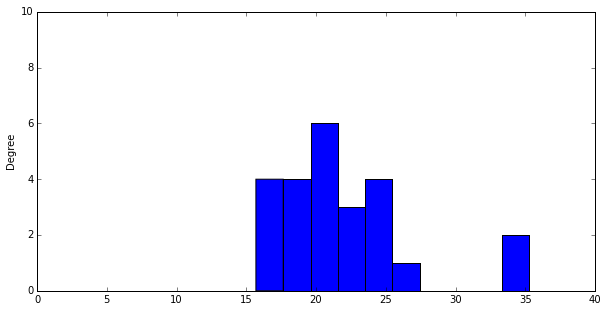

In [7]:
stroop['Incongruent'].plot(kind='hist', ylim=(0, 10), xlim=(0, 40), figsize=(10,5))

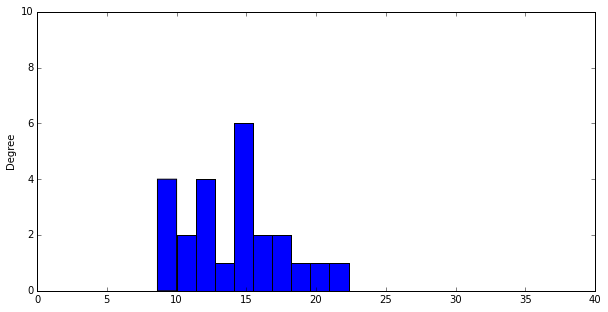

In [8]:
stroop['Congruent'].plot(kind='hist', ylim=(0, 10), xlim=(0, 40), figsize=(10,5))

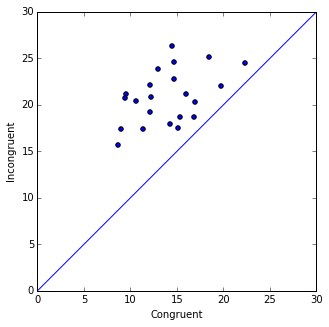

In [105]:
fig, ax = plt.subplots()
ax.set_xlim(0,30)
ax.set_ylim(0,30)
ax.set_ylabel('Incongruent')
ax.set_xlabel('Congruent')
ax.scatter(stroop['Congruent'], stroop['Incongruent'])
ax.plot([0, 30], [0, 30])
fig.set_size_inches(5, 5)
plt.show()

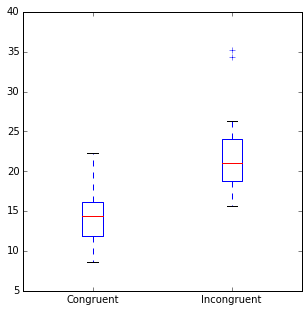

In [111]:
stroop.plot(kind='box', figsize=(5,5))

From initial inspection it appears there may be a difference.  Let's look at the statistics

#### Q5: Statistical tests

#### Calculate:   t-critical

In [30]:
t_critical = sp.stats.t.ppf(.025, dof)
print "t-critical +- ", abs(t_critical)

t-critical +-  2.06865761042


#### Calculate:t-statistic

In [31]:
stroop_difference = stroop['Incongruent'] - stroop['Congruent']
mean_difference = stroop_difference.mean()
sigma_difference = stroop_difference.std()
n_congruence = stroop['Incongruent'].count()
n_incongruence = stroop['Congruent'].count()
dof = n_congruence - 1
print "mean difference = ",stroop_difference.mean()
print "sigma difference = ", stroop_difference.std()
print "n-congruence = ", n_congruence
print "n-incongruence = ", n_incongruence
print "dof = ", n_congruence - 1

mean difference =  7.96479166667
sigma difference =  4.86482691036
n-congruence =  24
n-incongruence =  24
dof =  23


#### Calculate: Standard Error of Mean

We shouldn't use a pooled standard error.  The different SE's come from dependent groups.  Since we'll treat the differences as our actual sample we can simply use the ordinary standard error calculation based on the differences:

$$SE = \frac{SD_{d_{I-C}}}{\sqrt{n}}$$

In [33]:
sem = sigma_difference/np.sqrt(n_incongruence)
sem

0.99302863477834091

recall:
$$t = \frac{\bar{x} - \mu}{SE}$$

In [42]:
t = (mean_difference - 0)/float(sem)
print "t = ", t
print "p = ", (1 - sp.stats.t.cdf(t, dof))*2 ## because two tails

t =  8.02070694411
p =  4.10300058373e-08


#### Evaluate: t-test

$$ t > t_{critical} $$
$$ 8.021 \geq 2.013$$

**Reject the Null**

$$H_0\;:\mu_i - \mu_c = 0\\reject\;null$$

**Accept the Alternative**

$$H_A\;:\mu_i - \mu_c \neq 0\\accept\;alternative$$

$$p = 4.103*10^{-8}$$
$$p < .001$$ 

#### Calculate Confidence Interval

recall:
$$CI = f(confidence, se)$$

In [27]:
sp.stats.t.interval(.95, dof)

(-2.0686576104190406, 2.0686576104190406)

In [35]:
upperbound = mean_difference + sp.stats.t.interval(.95, dof)[1] * sem
lowerbound = mean_difference + sp.stats.t.interval(.95, dof)[0] * sem
print "Lower Bound: ", lowerbound, "\n", "Upper Bound: ", upperbound

Lower Bound:  5.91055542397 
Upper Bound:  10.0190279094


We're 95% confident that our difference falls within this range.  

## Conclusions

In [36]:
mean_difference

7.9647916666666658

Mean Difference 7.97s : CI 95%: (5.51, 10.42), p < .001, Cohen's D = 1.89

From the analysis it is clear there is a significant increase in time taken on the test when the words are incongruent with their colors.  

As for effect size, Cohen's D shows the mean time to identify all cards for the incongruence case is higher than $\approx$ 96% of the times in the congruent case.  



# Additional Stats

#### Cohen's D: 
how large is the effect?

we need pooled variance
reference: https://en.wikipedia.org/wiki/Pooled_variance
recall:
$$S_p^2 = \frac{(n_i - 1)S_i^2 + (n_c - 1)S_c^2}{(n_i - 1) + (n_c - 1)}$$

recall: 

$$Cohen's\;D = \frac{\bar{x} - \mu}{\sigma}$$

$$Cohen's\;D = \frac{7.965 - 0}{4.224}$$

In [37]:
var_congruence = stroop['Congruent'].var()
var_incongruence = stroop['Incongruent'].var()

pooled_variance =((n_congruence - 1)*var_congruence + (n_incongruence - 1)*var_incongruence)/(float(n_congruence - 1) + float(n_incongruence - 1))
pooled_std = np.sqrt(pooled_variance)
print "pooled sigma = ", pooled_std

pooled sigma =  4.22378894518


In [38]:
cohens_d = (mean_difference - 0)/float(pooled_std)
print "cohen's d = ", cohens_d

cohen's d =  1.88569830786


In [127]:
print "percentile of cohen's D", sp.stats.t.cdf(1.886, dof)

percentile of cohen's D 0.967190965473


The **Incongruent Mean** has a mean that would be in the **96th percentile** of the **Congruent Mean**.  

By this measure, this effect is large.  

#### Calculate: R^2

How much of the difference is from the independent variable congruence/incongruence

recall: 
$$R^2 = \frac{t^2}{(t^2 + dof)}$$
$$R^2 = \frac{t^2}{(t^2 + dof)}$$

In [39]:
r_squared = t**2/(t**2 + dof)
print "R^2 = ", r_squared

R^2 =  0.736636416145


By this measure, it appears the $\approx$73.7% of the change can be explained by the model.  